In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("clustering.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
#get rid of all unwanted columns
data.drop(columns=["Loan_ID",
                   "Dependents",
                   "Credit_History",
                   "Gender",
                   "Married",
                   "Education",
                   "Self_Employed",
                   "Property_Area",
                   "Loan_Status"],inplace=True)

In [5]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,4583,1508.0,128.0,360.0
1,3000,0.0,66.0,360.0
2,2583,2358.0,120.0,360.0
3,6000,0.0,141.0,360.0
4,2333,1516.0,95.0,360.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    381 non-null    int64  
 1   CoapplicantIncome  381 non-null    float64
 2   LoanAmount         381 non-null    float64
 3   Loan_Amount_Term   370 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 12.0 KB


In [7]:
data.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
dtype: int64

In [8]:
#fill it with mean values
data.fillna(data.mean(),inplace=True)

In [9]:
#get mean of all cols
data.mean()

ApplicantIncome      3579.845144
CoapplicantIncome    1277.275381
LoanAmount            104.986877
Loan_Amount_Term      340.864865
dtype: float64

In [10]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,4583,1508.0,128.0,360.0
1,3000,0.0,66.0,360.0
2,2583,2358.0,120.0,360.0
3,6000,0.0,141.0,360.0
4,2333,1516.0,95.0,360.0


In [11]:
#check again for null values
data.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
#Scaling the elements for data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [14]:
scaled_data[:3]

array([[ 0.70746877,  0.09869541,  0.81257519,  0.28364693],
       [-0.40893221, -0.5463709 , -1.37659578,  0.28364693],
       [-0.70301888,  0.4622938 ,  0.53010151,  0.28364693]])

In [15]:
#Split between train & test
train, test = train_test_split(scaled_data,
                               test_size = 0.20, 
                               random_state = 101)

In [16]:
train.shape

(304, 4)

In [17]:
test.shape

(77, 4)

In [18]:
from sklearn.cluster import KMeans

In [19]:
#Lets define Kmeans model
kmeans = KMeans(n_clusters=2, 
                init='k-means++', 
                max_iter=300, 
                n_init=10, 
                random_state=0)

In [20]:
kmeans.fit(train)

KMeans(n_clusters=2, random_state=0)

In [21]:
#Get the co-ordinates for centroids
kmeans.cluster_centers_

array([[ 0.69259221, -0.12556389,  0.69948337,  0.00215993],
       [-0.53464829,  0.11619225, -0.63999463, -0.01401727]])

In [22]:
#Within cluster sum of squares
kmeans.inertia_

1015.1330949821025

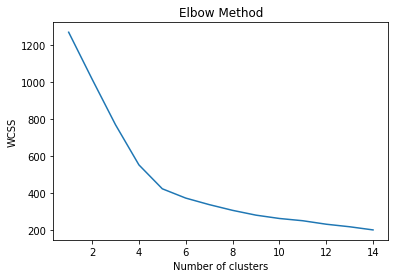

In [23]:
#Lets implement elbow method

wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
#Implement clusters with 4 centers
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [29]:
#Lets predict
kmeans.fit(train)

KMeans(n_clusters=6, random_state=0)

In [30]:
kmeans.cluster_centers_

array([[-0.72900558,  0.43910626,  0.33052772,  0.31923344],
       [ 0.1108073 ,  0.05573275, -0.20508666, -2.76572925],
       [ 0.45777047, -0.32148479,  0.5422916 ,  0.30528102],
       [-0.32251569, -0.36734267, -1.30404261,  0.25150862],
       [ 2.31497333, -0.32456733,  0.63461677,  0.05884472],
       [-0.99569507, 10.9683622 , -0.2996649 ,  0.28364693]])

In [31]:
predicted_clusters_ = kmeans.predict(test)

In [32]:
predicted_clusters_

array([0, 2, 3, 0, 3, 1, 4, 2, 4, 2, 0, 0, 0, 2, 0, 3, 0, 0, 2, 1, 3, 3,
       0, 1, 3, 2, 0, 0, 0, 2, 0, 1, 0, 4, 0, 0, 0, 2, 2, 2, 4, 0, 0, 2,
       4, 2, 0, 4, 1, 3, 3, 2, 2, 4, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 3, 1,
       2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2], dtype=int32)

In [33]:
#train & fit on full data
_c = kmeans.fit_predict(data)

In [34]:
#integrate it with original data
data['clusters'] = _c

In [35]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,clusters
0,4583,1508.0,128.0,360.0,0
1,3000,0.0,66.0,360.0,4
2,2583,2358.0,120.0,360.0,3
3,6000,0.0,141.0,360.0,0
4,2333,1516.0,95.0,360.0,3


In [39]:
data.groupby('clusters')['ApplicantIncome'].agg(['mean','min','max'])

,mean,min,max
clusters,,,
0,5705.189189,4547,9703
1,3900.600000,1916,8750
2,1836.000000,1836,1836
3,2745.861635,150,4750
4,3355.531746,1442,4467
5,2500.000000,2500,2500


In [44]:
data.loc[data.clusters == 0]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,clusters
0,4583,1508.0,128.0,360.0,0
3,6000,0.0,141.0,360.0,0
9,4950,0.0,125.0,360.0,0
12,4887,0.0,133.0,360.0,0
14,7660,0.0,104.0,360.0,0
...,...,...,...,...,...
353,5800,0.0,132.0,360.0,0
359,6406,0.0,150.0,360.0,0
370,4750,0.0,94.0,360.0,0
376,5703,0.0,128.0,360.0,0


In [42]:
data.loc[data.clusters == 2]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,clusters
364,1836,33837.0,90.0,360.0,2


In [43]:
data.groupby('clusters')['LoanAmount'].agg(['mean','min','max'])

,mean,min,max
clusters,,,
0,115.905405,26.0,150.0
1,113.400000,56.0,150.0
2,90.000000,90.0,90.0
3,111.169811,17.0,150.0
4,89.571429,9.0,138.0
5,103.000000,103.0,103.0
